# Welcome!

In this lab section we will be utilizing the data from https://www.kaggle.com/primaryobjects/voicegender#

Do note that there is some tricky ethical stuff here considering that the voice of Philippe Jaroussky could be classified as Female (Countertenor) while the voice of Nathalie Stutzmann might be classified as Male (Contralto).


For the exercise we will be following my framework TACT which is to Target, Arrange, Compose, and Transmit.

Read more about it here: tactmethod.com


# What is our target?

In general we want to achieve a highly precise classifier utilizing voice data (as close to 100% as possible).

How do we go about doing this? There are a few directions to go in this exercise either we do feature selection, feature transformation, or ensemble learning.



# Arrange data

The first step is to load up the data

Also it's good to note what exactly is in it:

## The Dataset
The following acoustic properties of each voice are measured and included within the CSV:

* meanfreq: mean frequency (in kHz)
* sd: standard deviation of frequency
* median: median frequency (in kHz)
* Q25: first quantile (in kHz)
* Q75: third quantile (in kHz)
* IQR: interquantile range (in kHz)
* skew: skewness (see note in specprop description)
* kurt: kurtosis (see note in specprop description)
* sp.ent: spectral entropy
* sfm: spectral flatness
* mode: mode frequency
* centroid: frequency centroid (see specprop)
* peakf: peak frequency (frequency with highest energy)
* meanfun: average of fundamental frequency measured across acoustic signal
* minfun: minimum fundamental frequency measured across acoustic signal
* maxfun: maximum fundamental frequency measured across acoustic signal
* meandom: average of dominant frequency measured across acoustic signal
* mindom: minimum of dominant frequency measured across acoustic signal
* maxdom: maximum of dominant frequency measured across acoustic signal
* dfrange: range of dominant frequency measured across acoustic signal
* modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
* label: male or female (Note that we don't want to classify on this!)

In [4]:
#!pip install pandas
import pandas as pd

df = pd.read_csv('/content/voice.csv') 

y = df['label']
X = df[set(df.columns) - set(['label'])]

In [5]:
!more ~/Documents/pyMattHarrison/Ensemble_DeepLearning/practical-machine-learning-master/data/voice.csv

more: stat of /root/Documents/pyMattHarrison/Ensemble_DeepLearning/practical-machine-learning-master/data/voice.csv failed: No such file or directory


In [23]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

,count,mean,std,min,25%,50%,75%,max
meanfreq,3168.0,0.180907,0.029918,0.039363,0.163662,0.184838,0.199146,0.251124
sd,3168.0,0.057126,0.016652,0.018363,0.041954,0.059155,0.067020,0.115273
median,3168.0,0.185621,0.036360,0.010975,0.169593,0.190032,0.210618,0.261224
Q25,3168.0,0.140456,0.048680,0.000229,0.111087,0.140286,0.175939,0.247347
Q75,3168.0,0.224765,0.023639,0.042946,0.208747,0.225684,0.243660,0.273469
IQR,3168.0,0.084309,0.042783,0.014558,0.042560,0.094280,0.114175,0.252225
skew,3168.0,3.140168,4.240529,0.141735,1.649569,2.197101,2.931694,34.725453
kurt,3168.0,36.568461,134.928661,2.068455,5.669547,8.318463,13.648905,1309.612887
sp.ent,3168.0,0.895127,0.044980,0.738651,0.861811,0.901767,0.928713,0.981997
sfm,3168.0,0.408216,0.177521,0.036876,0.258041,0.396335,0.533676,0.842936


# Strawman Model

Always always start with a baseline model. What is a decent enough model and what isn't?

KNN and Naive Bayesian models are pretty easy to utilize and generally get someone started

Can we make this better?

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report

# K-Nearest Neighbors is usually where the introduction class leaves off
X_train, X_test, y_train, y_test = train_test_split(X, y)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
nb = BernoulliNB()
nb.fit(X_train, y_train)

print("KNN")
print(classification_report(knn.predict(X_test), y_test))
print("Naive Bayesian")
print(classification_report(nb.predict(X_test), y_test))

KNN
              precision    recall  f1-score   support

      female       0.69      0.74      0.71       363
        male       0.76      0.72      0.74       429

    accuracy                           0.73       792
   macro avg       0.73      0.73      0.73       792
weighted avg       0.73      0.73      0.73       792

Naive Bayesian
              precision    recall  f1-score   support

      female       0.94      0.51      0.66       724
        male       0.11      0.68      0.19        68

    accuracy                           0.52       792
   macro avg       0.53      0.59      0.43       792
weighted avg       0.87      0.52      0.62       792



# Thoughts?

What are your thoughts on the above classification report. Note that when we look at KNN the precision is around 70% which is ok, but not great. Can we do better by selecting better features? OR transforming features?

# Feature Selection

Looking at the data what is a good feature?

In general there are a few directions to go here. We can look at Feature Importance by running this through a classifier, or we could look at variance thresholds

In [30]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# If we take the data and fit it into a small support vector machine
# We can figure out what has the highest weighting and then turn it into a new transformer
# SelectFromModel does the heavy lifting
# l1 is more contrained but can use l2 as well.

lsvc = LinearSVC(C=0.01, penalty="l2", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
print(X_new.shape)
print(X_new[10:])

(3168, 5)
[[0.73369288 0.96524914 0.10142993 0.08889398 0.11530982]
 [0.75204201 0.96600378 0.08731383 0.10419932 0.11542553]
 [0.73614996 0.96351353 0.0831449  0.09264402 0.12608187]
 ...
 [0.65419636 0.94685426 0.03342387 0.20991768 0.19093638]
 [0.67546972 0.95043638 0.0435081  0.172375   0.1764347 ]
 [0.60152881 0.93882942 0.0700715  0.18560693 0.18075587]]


In [8]:
knn = KNeighborsClassifier()
knn.fit(model.transform(X_train), y_train)
nb = BernoulliNB()
nb.fit(model.transform(X_train), y_train)

print("KNN")
print(classification_report(knn.predict(model.transform(X_test)), y_test))
print("Naive Bayesian")
print(classification_report(nb.predict(model.transform(X_test)), y_test))

KNN
              precision    recall  f1-score   support

      female       0.69      0.71      0.70       375
        male       0.74      0.71      0.72       417

    accuracy                           0.71       792
   macro avg       0.71      0.71      0.71       792
weighted avg       0.71      0.71      0.71       792

Naive Bayesian
              precision    recall  f1-score   support

      female       1.00      0.49      0.66       792
        male       0.00      0.00      0.00         0

    accuracy                           0.49       792
   macro avg       0.50      0.24      0.33       792
weighted avg       1.00      0.49      0.66       792



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
from sklearn.ensemble import ExtraTreesClassifier

# Tree based models can also determine what is most indicative by looking at feature importance
# Feature importances are usually what are the attributes that yield the biggest change to the outcome

clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X, y)
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape

(3168, 5)

In [10]:
knn = KNeighborsClassifier()
knn.fit(model.transform(X_train), y_train)
nb = BernoulliNB()
nb.fit(model.transform(X_train), y_train)

print("KNN")
print(classification_report(knn.predict(model.transform(X_test)), y_test))
print("Naive Bayesian")
print(classification_report(nb.predict(model.transform(X_test)), y_test))

KNN
              precision    recall  f1-score   support

      female       0.99      0.97      0.98       394
        male       0.97      0.99      0.98       398

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792

Naive Bayesian
              precision    recall  f1-score   support

      female       1.00      0.49      0.66       792
        male       0.00      0.00      0.00         0

    accuracy                           0.49       792
   macro avg       0.50      0.24      0.33       792
weighted avg       1.00      0.49      0.66       792



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# What do you get from the above classification?

Note that having a precision of 97% purely based on selecting the right features is pretty good!

A tree based approach seems to yield some fruit.

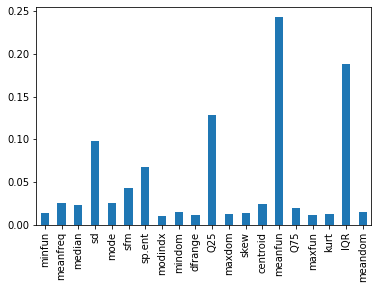

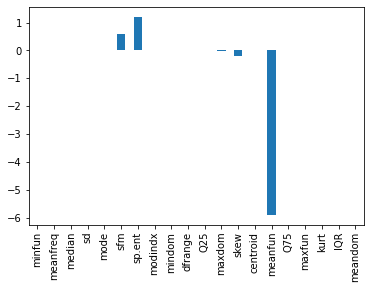

In [11]:
# Visualize the differences\
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

pd.Series(dict(zip(X.columns, clf.feature_importances_))).plot.bar()
plt.show()
pd.Series(dict(zip(X.columns, lsvc.coef_[0]))).plot.bar()
plt.show()
# view.plot.bar()

# What do you learn from this?

Looking at the plots above what can you learn? What is the most important feature as it relates to gendered voice given tree classifications?

What is the most important coefficient for a linear model?

# Feature Transformation

Above we selected features that are most likely to help us classify. But what if we don't want to give up on features? What if we want to keep it all?

There are generally a few directions we can go in.

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition

Here's a bunch of options ranked from simplistic to state of the art

* PCA (Principal Component Analysis)
* ICA (Independent Component Analysis)
* UMAP (Uniform Manifold Approximation and Projection for Dimension Reduction)

In [12]:
# PCA (usually 2 components is a start)
from sklearn.decomposition import PCA

model = PCA(n_components=4)
model.fit(X)

knn = KNeighborsClassifier()
knn.fit(model.transform(X_train), y_train)
nb = BernoulliNB()
nb.fit(model.transform(X_train), y_train)

print("KNN")
print(classification_report(knn.predict(model.transform(X_test)), y_test))
print("Naive Bayesian")
print(classification_report(nb.predict(model.transform(X_test)), y_test))

KNN
              precision    recall  f1-score   support

      female       0.66      0.71      0.69       363
        male       0.74      0.70      0.72       429

    accuracy                           0.70       792
   macro avg       0.70      0.70      0.70       792
weighted avg       0.71      0.70      0.70       792

Naive Bayesian
              precision    recall  f1-score   support

      female       0.59      0.72      0.65       317
        male       0.78      0.66      0.72       475

    accuracy                           0.69       792
   macro avg       0.68      0.69      0.68       792
weighted avg       0.70      0.69      0.69       792



In [13]:
from sklearn.decomposition import FastICA

model = FastICA(4)
model.fit(X)

knn = KNeighborsClassifier()
knn.fit(model.transform(X_train), y_train)
nb = BernoulliNB()
nb.fit(model.transform(X_train), y_train)

print("KNN")
print(classification_report(knn.predict(model.transform(X_test)), y_test))
print("Naive Bayesian")
print(classification_report(nb.predict(model.transform(X_test)), y_test))

KNN
              precision    recall  f1-score   support

      female       0.73      0.74      0.73       381
        male       0.75      0.74      0.75       411

    accuracy                           0.74       792
   macro avg       0.74      0.74      0.74       792
weighted avg       0.74      0.74      0.74       792

Naive Bayesian
              precision    recall  f1-score   support

      female       0.78      0.61      0.68       492
        male       0.53      0.71      0.61       300

    accuracy                           0.65       792
   macro avg       0.65      0.66      0.64       792
weighted avg       0.68      0.65      0.65       792



In [14]:
import umap

model = umap.UMAP()
model.fit(X)

knn = KNeighborsClassifier()
knn.fit(model.transform(X_train), y_train)
nb = BernoulliNB()
nb.fit(model.transform(X_train), y_train)

print("KNN")
print(classification_report(knn.predict(model.transform(X_test)), y_test))
print("Naive Bayesian")
print(classification_report(nb.predict(model.transform(X_test)), y_test))

KNN
              precision    recall  f1-score   support

      female       0.66      0.65      0.65       394
        male       0.66      0.67      0.66       398

    accuracy                           0.66       792
   macro avg       0.66      0.66      0.66       792
weighted avg       0.66      0.66      0.66       792

Naive Bayesian
              precision    recall  f1-score   support

      female       0.84      0.60      0.70       546
        male       0.45      0.74      0.56       246

    accuracy                           0.64       792
   macro avg       0.65      0.67      0.63       792
weighted avg       0.72      0.64      0.65       792



# Not the best results but what did we learn?

In the above sections we tried out selecting better features and even transforming the existing features into a new matrix. The best approach from above was using KNN with Tree based selection. While that's true, can we utilize a better algorithm to get even better results?

# Ensemble Learning

In general ensemble learning shows up either as bagging, or boosting, sometimes bayesian selection.

In this section we'll show the results of Bagging first and then Random Forests and then Boosting using XgBoost (state of the art).

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

model = BaggingClassifier()
model.fit(X_train, y_train)

print(classification_report(model.predict(X_test), y_test))

              precision    recall  f1-score   support

      female       0.98      0.96      0.97       394
        male       0.97      0.98      0.97       398

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



# Great results! can we do better?

In [16]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('feature_selection', SelectFromModel(LinearSVC(C=0.01))),
    ('bagger', BaggingClassifier())])


pipe.fit(X_train, y_train)

print(classification_report(pipe.predict(X_test), y_test))

              precision    recall  f1-score   support

      female       0.99      0.96      0.97       403
        male       0.96      0.99      0.97       389

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('feature_transformer', FastICA(15)),
    ('bagger', BaggingClassifier())])


pipe.fit(X_train, y_train)

print(classification_report(pipe.predict(X_test), y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


              precision    recall  f1-score   support

      female       0.98      0.96      0.97       396
        male       0.96      0.98      0.97       396

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792



# There are endless possibilities

Note that this is an area of research: AutoML. Basically there's so many options, so many possibilities it'd take forever to explain them all.

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

      female       0.99      0.97      0.98       397
        male       0.97      0.99      0.98       395

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



In [19]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)

print(classification_report(clf.predict(X_test), y_test))

              precision    recall  f1-score   support

      female       0.99      0.97      0.98       396
        male       0.97      0.99      0.98       396

    accuracy                           0.98       792
   macro avg       0.98      0.98      0.98       792
weighted avg       0.98      0.98      0.98       792



In [20]:
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('transformer', PCA(10)),
    ('estimator', XGBClassifier())
])

pipe.fit(X_train, y_train)


print(classification_report(pipe.predict(X_test), y_test))

              precision    recall  f1-score   support

      female       0.98      0.96      0.97       395
        male       0.96      0.98      0.97       397

    accuracy                           0.97       792
   macro avg       0.97      0.97      0.97       792
weighted avg       0.97      0.97      0.97       792

